

# Sampling theorem
---


In [4]:
'''
_____________ Author _______________
Nazanin Mohammadrezaei
        
______________ COURSE ______________
Master the Fourier transform and its applications

______________ Topic _______________
The concept of frequency resolution, and the effect of zero padding in time and frequency domain 

____________ Instructor ____________
mikexcohen.com

'''

import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


# create the signal
srate  = 1000
pnts   = 1000
signal = np.random.randn(pnts)

# compute frequencies vector
hz = np.linspace(0,srate/2,(np.floor(pnts/2)+1).astype(int))

# compute frequency resolution
freqres = np.mean(np.diff(hz))

# print result in command window
print('Frequency resolution is',freqres,'Hz')

Frequency resolution is 1.0 Hz


# Time-domain zeropadding non-manually inside the fft function
---

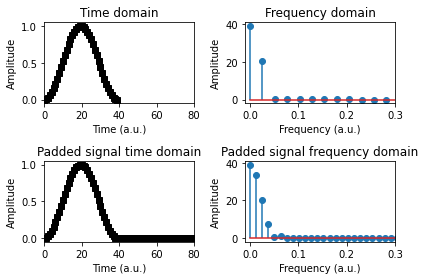

In [34]:
# create the signal
signal = np.hanning(40)
padded_signal = np.concatenate((signal,np.zeros(len(signal))),axis=0)

# fast Fourier transform
signalX = scipy.fftpack.fft(signal)
padded_signalX = scipy.fftpack.fft(padded_signal)

# extract amplitude
ampl = 2*np.abs(signalX)
padded_ampl = 2*np.abs(padded_signalX)

# normalized frequency units
frequnits = np.linspace(0,1,len(signal))
padded_frequnits = np.linspace(0,1,len(padded_signal))

# and plots
plt.subplot2grid((2,2),(0,0))
plt.plot(signal,'ks-')
plt.xlim(0,80)
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.title('Time domain')

plt.subplot2grid((2,2),(0,1))
plt.stem(frequnits,ampl,use_line_collection=True)
plt.xlim(-.01,.3)
plt.xlabel('Frequency (a.u.)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')

plt.subplot2grid((2,2),(1,0))
plt.plot(padded_signal,'ks-')
plt.xlim(0,80)
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.title('Padded signal time domain')

plt.subplot2grid((2,2),(1,1))
plt.stem(padded_frequnits,padded_ampl,use_line_collection=True)
plt.xlim(-.01,.3)
plt.xlabel('Frequency (a.u.)')
plt.ylabel('Amplitude')
plt.title('Padded signal frequency domain')
plt.tight_layout()
plt.show()


# Time-domain zero-padding non-manually inside the fft function
---

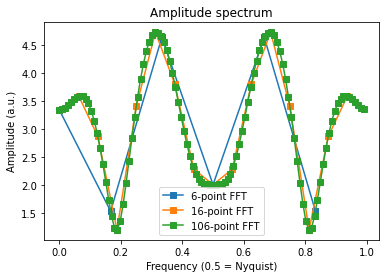

In [5]:

# create the signal
signal = [ 4, 6, -1, 0, 5, -4 ]

# number of zeros to add after signal
n2pad = [ 0, 10, 100 ]

for zi in range(0,len(n2pad)):
    
    # total length of signal
    zeropadN = len(signal)+n2pad[zi]
    
    # FFT and amplitude
    sigampl   = 2*np.abs( scipy.fftpack.fft(signal,zeropadN) ) / len(signal)    
    frequnits = np.linspace(0,1,zeropadN+1)
    
    # add plots
    plt.plot(frequnits[:-1],sigampl,'s-',label='%g-point FFT' %zeropadN)


# add some plot extras
plt.legend()
plt.xlabel('Frequency (0.5 = Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Amplitude spectrum')
plt.show()

# Frequency-domain zero padding
---


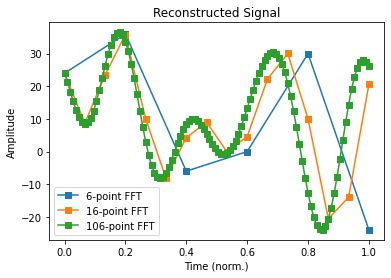

In [6]:
# create the signal
signal = [ 4, 6, -1, 0, 5, -4 ]

# fft
signalX = scipy.fftpack.fft(signal)
    
# number of zeros to add after spectrum
n2pad = [ 0, 10, 100 ]

for zi in range(len(n2pad)):
    
    # spectral zero-padding
    zeropadN = len(signal)+n2pad[zi]
    
    # reconstruction via ifft
    reconSig = scipy.fftpack.ifft(signalX,zeropadN) * zeropadN
    normtime = np.linspace(0,1,len(reconSig))
    
    # and plot
    plt.plot(normtime,np.real(reconSig),'s-',label='%g-point FFT' %zeropadN)

# add some plot extras
plt.legend()
plt.xlabel('Time (norm.)')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal')
plt.show()